# Goal
### Create suitable categorical variables, choose most significant variables, choose two prediction models and and pick the best one

In [90]:
import pandas as pd; pd.set_option('display.max_columns', 1000); pd.set_option('display.max_rows', 1000) ; pd.set_option('display.width', 1000)
import numpy as np
#import the cleaned and preprocessed data ready for prediction analysis
san_fran_df = pd.read_csv('data_for_prediction.csv')

In [91]:
import mapclassify

# Choosing the most relevant features for the predictive model

In [92]:
san_fran_df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,geometry,area_label
0,2018-01-01 00:01:53,2018-01-01 03:50:23,86,37.769305,-122.426826,119,37.761047,-122.432642,2924,0 days 03:48:30,NaN,0 days 00:01:53,14.0,12.0,28.0,27.0,Mostly Cloudy,Mostly Cloudy,1018.6,1019.96,6.0,0.0,0.0,0.0,14.0,12.0,0,0,2.0,4,0,1.050128,POINT (-122.4268256 37.7693053),2
1,2018-01-01 00:07:52,2018-01-01 00:19:47,74,37.776435,-122.426244,70,37.773311,-122.444293,2423,0 days 00:11:55,NaN,0 days 00:07:52,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,1.627451,POINT (-122.4262440205 37.7764348192),2
2,2018-01-01 00:09:31,2018-01-01 00:28:43,97,37.768265,-122.420110,125,37.759200,-122.409851,3455,0 days 00:19:12,NaN,0 days 00:09:31,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,1.352513,POINT (-122.4201102 37.7682646),2
3,2018-01-01 00:14:37,2018-01-01 00:37:16,11,37.797280,-122.398436,323,37.798014,-122.405950,2173,0 days 00:22:39,NaN,0 days 00:14:37,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,0.666811,POINT (-122.398436 37.79728),2
4,2018-01-01 00:15:26,2018-01-01 05:08:01,55,37.777053,-122.429558,285,37.783521,-122.431158,2315,0 days 04:52:35,NaN,0 days 00:15:26,14.0,12.0,28.0,27.0,Mostly Cloudy,Mostly Cloudy,1018.6,1020.63,6.0,6.0,0.0,0.0,14.0,12.0,0,0,2.0,4,0,0.731608,POINT (-122.4295585 37.7770527),2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362596,2018-12-31 23:48:49,2018-12-31 23:55:40,21,37.789625,-122.400811,16,37.794130,-122.394430,5247,0 days 00:06:51,0 days 07:55:32,54 days 06:50:05,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.6,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,0.752240,POINT (-122.400811 37.7896254),2
1362597,2018-12-31 23:48:55,2018-12-31 23:55:33,21,37.789625,-122.400811,16,37.794130,-122.394430,4962,0 days 00:06:38,0 days 03:25:11,54 days 07:00:52,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.6,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,0.752240,POINT (-122.400811 37.7896254),2
1362598,2018-12-31 23:49:14,2018-12-31 23:55:40,21,37.789625,-122.400811,16,37.794130,-122.394430,5463,0 days 00:06:26,0 days 12:03:05,54 days 06:51:43,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.6,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,0.752240,POINT (-122.400811 37.7896254),2
1362599,2018-12-31 23:59:11,2019-01-01 00:35:01,3,37.786375,-122.404904,368,37.785434,-122.419622,5549,0 days 00:35:50,0 days 12:16:27,19 days 09:19:22,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.6,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.300608,POINT (-122.4049043655 37.7863752686),2


In [93]:
san_fran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362601 entries, 0 to 1362600
Data columns (total 34 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   start_time                     1362601 non-null  object 
 1   end_time                       1362601 non-null  object 
 2   start_station_id               1362601 non-null  int64  
 3   start_station_lat              1362601 non-null  float64
 4   start_station_lon              1362601 non-null  float64
 5   end_station_id                 1362601 non-null  int64  
 6   end_station_lat                1362601 non-null  float64
 7   end_station_lon                1362601 non-null  float64
 8   bike_id                        1362601 non-null  int64  
 9   trip_duration                  1362601 non-null  object 
 10  idle_time                      1359902 non-null  object 
 11  station_idle_time              1362601 non-null  object 
 12  start_temperat

In [94]:
from shapely import wkt #The wkt.loads function converts a well-known text (WKT) representation of a geometry into a Shapely geometry object.
san_fran_df['geometry'] = san_fran_df['geometry'].apply(wkt.loads)

san_fran_df_geo = gpd.GeoDataFrame(san_fran_df, geometry='geometry')
san_fran_df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1362601 entries, 0 to 1362600
Data columns (total 34 columns):
 #   Column                         Non-Null Count    Dtype   
---  ------                         --------------    -----   
 0   start_time                     1362601 non-null  object  
 1   end_time                       1362601 non-null  object  
 2   start_station_id               1362601 non-null  int64   
 3   start_station_lat              1362601 non-null  float64 
 4   start_station_lon              1362601 non-null  float64 
 5   end_station_id                 1362601 non-null  int64   
 6   end_station_lat                1362601 non-null  float64 
 7   end_station_lon                1362601 non-null  float64 
 8   bike_id                        1362601 non-null  int64   
 9   trip_duration                  1362601 non-null  object  
 10  idle_time                      1359902 non-null  object  
 11  station_idle_time              1362601 non-null  object

In [95]:
san_fran_df_geo['start_time'] = pd.to_datetime(san_fran_df_geo['start_time'])
san_fran_df_geo['end_time'] = pd.to_datetime(san_fran_df_geo['end_time']) 
                                                
san_fran_df_geo['trip_duration'] = pd.to_timedelta(san_fran_df_geo['trip_duration'])
san_fran_df_geo['idle_time'] = pd.to_timedelta(san_fran_df_geo['idle_time'])
san_fran_df_geo['station_idle_time'] = pd.to_timedelta(san_fran_df_geo['station_idle_time'])


In [96]:
san_fran_df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1362601 entries, 0 to 1362600
Data columns (total 34 columns):
 #   Column                         Non-Null Count    Dtype          
---  ------                         --------------    -----          
 0   start_time                     1362601 non-null  datetime64[ns] 
 1   end_time                       1362601 non-null  datetime64[ns] 
 2   start_station_id               1362601 non-null  int64          
 3   start_station_lat              1362601 non-null  float64        
 4   start_station_lon              1362601 non-null  float64        
 5   end_station_id                 1362601 non-null  int64          
 6   end_station_lat                1362601 non-null  float64        
 7   end_station_lon                1362601 non-null  float64        
 8   bike_id                        1362601 non-null  int64          
 9   trip_duration                  1362601 non-null  timedelta64[ns]
 10  idle_time                      135

# POI features

In [97]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import geopandas as gpd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")

In [98]:
#importing POI data
north_cali_loc = pd.read_csv('NorthernCalifornia_POIs', low_memory=False)
pois_df = gpd.GeoDataFrame(north_cali_loc, geometry=gpd.points_from_xy(north_cali_loc['lon'], north_cali_loc['lat']))

In [99]:
pois_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 206875 entries, 0 to 206874
Columns: 114 entries, Unnamed: 0 to tyres
dtypes: float64(3), geometry(1), int64(3), object(107)
memory usage: 179.9+ MB


In [100]:
pois_df



,Unnamed: 0,version,timestamp,changeset,id,tags,lat,lon,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,operator,phone,ref,url,website,amenity,atm,bank,bicycle_parking,bicycle_rental,bar,building,building:levels,cafe,car_wash,drinking_water,fast_food,fountain,fuel,gambling,ice_cream,internet_access,kindergarten,landuse,library,office,parking,police,school,social_facility,source,start_date,theatre,university,wikipedia,agrarian,alcohol,bakery,bicycle,books,car,clothes,coffee,collector,computer,cosmetics,craft,dry_cleaning,fireplace,furniture,gas,hairdresser,kiosk,kitchen,lottery,massage,medical_supply,model,motorcycle,music,musical_instrument,organic,outdoor,pet,religion,second_hand,shoes,shop,ski,supermarket,trade,video,water,wholesale,wine,attraction,camp_site,guest_house,information,museum,tourism,viewpoint,zoo,geometry,osm_type,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres
0,0,3,1567817615,0.0,15972546,"{""brand"":""Chase"",""brand:wikidata"":""Q524629"",""b...",36.979366,-122.02073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase,NaN,NaN,NaN,NaN,NaN,NaN,bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.02073 36.97937),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,9,1511822788,0.0,26637661,"{""direction"":""45-112"",""ele"":""1343"",""name:zh"":""...",37.715797,-119.67690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tunnel View,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USGS Topo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,viewpoint,NaN,NaN,POINT (-119.67690 37.71580),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,1413753424,0.0,29946571,"{""access"":""public""}",40.685482,-121.41899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toilets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.41899 40.68548),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,1190872143,0.0,33112985,"{""created_by"":""JOSM""}",41.823452,-121.50175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Captain Jack's Stronghold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,attraction,NaN,NaN,POINT (-121.50175 41.82345),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2,1250367159,0.0,33113436,NaN,41.758180,-121.56817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fleener Chimneys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,attraction,NaN,NaN,POINT (-121.56817 41.75818),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [101]:
#drop useless columns in pois_df
columns_to_drop = ['Unnamed: 0','tags', 'operator', 'phone', 'ref', 'url', 'website', 'addr:city', 'addr:country', 'addr:full','addr:housenumber', 'addr:housename', 'addr:postcode', 'addr:place', 'addr:street', 'email']
pois_df = pois_df.drop(columns_to_drop,axis=1)

In [ ]:
name = pois_df['name'].unique().tolist()
print(name)



In [ ]:
#look up all unique values in column 'amenity'
amenity = pois_df['amenity'].unique().tolist()
print(amenity)

In [104]:
pois_df_geo = pois_df
pois_df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 206875 entries, 0 to 206874
Data columns (total 98 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   version             206875 non-null  int64   
 1   timestamp           206875 non-null  int64   
 2   changeset           110200 non-null  float64 
 3   id                  206875 non-null  object  
 4   lat                 109197 non-null  float64 
 5   lon                 109197 non-null  float64 
 6   name                93836 non-null   object  
 7   opening_hours       11185 non-null   object  
 8   amenity             157170 non-null  object  
 9   atm                 890 non-null     object  
 10  bank                7 non-null       object  
 11  bicycle_parking     3995 non-null    object  
 12  bicycle_rental      216 non-null     object  
 13  bar                 119 non-null     object  
 14  building            29137 non-null   object  
 15  building:

In [105]:
from shapely.geometry import Point

pois_df_geo['geometry'] = pois_df_geo.apply(lambda row: Point(row['lon'], row['lat']), axis=1)


/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [106]:
# checl the coordinate reference system
print(pois_df_geo.crs)
print(san_fran_df_geo.crs)

None
None


In [107]:
pois_df_geo = pois_df_geo.set_crs(epsg=7131)
san_fran_df_geo = san_fran_df_geo.set_crs(epsg=7131)

In [108]:
# checl the coordinate reference systepoi
pois_df_geo.crs


<Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [109]:
san_fran_df_geo.crs

<Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meters)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## King street station

In [110]:
# we use the coordinates of the Tahoe Convoy bus station as a placeholder of the coordinates for the King street station
central_station = pois_df_geo[pois_df_geo['name'] == 'Tahoe Convoy']
central_station




,version,timestamp,changeset,id,lat,lon,name,opening_hours,amenity,atm,bank,bicycle_parking,bicycle_rental,bar,building,building:levels,cafe,car_wash,drinking_water,fast_food,fountain,fuel,gambling,ice_cream,internet_access,kindergarten,landuse,library,office,parking,police,school,social_facility,source,start_date,theatre,university,wikipedia,agrarian,alcohol,bakery,bicycle,books,car,clothes,coffee,collector,computer,cosmetics,craft,dry_cleaning,fireplace,furniture,gas,hairdresser,kiosk,kitchen,lottery,massage,medical_supply,model,motorcycle,music,musical_instrument,organic,outdoor,pet,religion,second_hand,shoes,shop,ski,supermarket,trade,video,water,wholesale,wine,attraction,camp_site,guest_house,information,museum,tourism,viewpoint,zoo,geometry,osm_type,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres
79303,2,1617944594,0.0,8418786287,37.775352,-122.39713,Tahoe Convoy,NaN,bus_station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.397 37.775),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
print(san_fran_df_geo.geometry.index)
print(central_station.geometry.index)


RangeIndex(start=0, stop=1362601, step=1)
Int64Index([79303], dtype='int64')


In [112]:
central_station.geometry = central_station.geometry.reindex(san_fran_df_geo.geometry.index)


/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [113]:
san_fran_df_geo['distance_central_station'] = san_fran_df_geo.geometry.distance(central_station.geometry)
san_fran_df_geo

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,geometry,area_label,distance_central_station
0,2018-01-01 00:01:53,2018-01-01 03:50:23,86,37.769305,-122.426826,119,37.761047,-122.432642,2924,0 days 03:48:30,NaT,0 days 00:01:53,14.0,12.0,28.0,27.0,Mostly Cloudy,Mostly Cloudy,1018.6,1019.96,6.0,0.0,0.0,0.0,14.0,12.0,0,0,2.0,4,0,1.050128,POINT (-122.427 37.769),2,NaN
1,2018-01-01 00:07:52,2018-01-01 00:19:47,74,37.776435,-122.426244,70,37.773311,-122.444293,2423,0 days 00:11:55,NaT,0 days 00:07:52,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,1.627451,POINT (-122.426 37.776),2,NaN
2,2018-01-01 00:09:31,2018-01-01 00:28:43,97,37.768265,-122.420110,125,37.759200,-122.409851,3455,0 days 00:19:12,NaT,0 days 00:09:31,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,1.352513,POINT (-122.420 37.768),2,NaN
3,2018-01-01 00:14:37,2018-01-01 00:37:16,11,37.797280,-122.398436,323,37.798014,-122.405950,2173,0 days 00:22:39,NaT,0 days 00:14:37,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,0.666811,POINT (-122.398 37.797),2,NaN
4,2018-01-01 00:15:26,2018-01-01 05:08:01,55,37.777053,-122.429558,285,37.783521,-122.431158,2315,0 days 04:52:35,NaT,0 days 00:15:26,14.0,12.0,28.0,27.0,Mostly Cloudy,Mostly Cloudy,1018.6,1020.63,6.0,6.0,0.0,0.0,14.0,12.0,0,0,2.0,4,0,0.731608,POINT (-122.430 37.777),2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362596,2018-12-31 23:48:49,2018-12-31 23:55:40,21,37.789625,-122.400811,16,37.794130,-122.394430,5247,0 days 00:06:51,0 days 07:55:32,54 days 06:50:05,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.6,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,0.752240,POINT (-122.401 37.790),2,NaN
1362597,2018-12-31 23:48:55,2018-12-31 23:55:33,21,37.789625,-122.400811,16,37.794130,-122.394430,4962,0 days 00:06:38,0 days 03:25:11,54 days 07:00:52,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.6,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,0.752240,POINT (-122.401 37.790),2,NaN
1362598,2018-12-31 23:49:14,2018-12-31 23:55:40,21,37.789625,-122.400811,16,37.794130,-122.394430,5463,0 days 00:06:26,0 days 12:03:05,54 days 06:51:43,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.6,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,0.752240,POINT (-122.401 37.790),2,NaN
1362599,2018-12-31 23:59:11,2019-01-01 00:35:01,3,37.786375,-122.404904,368,37.785434,-122.419622,5549,0 days 00:35:50,0 days 12:16:27,19 days 09:19:22,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.6,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.300608,POINT (-122.405 37.786),2,NaN


In [114]:
from shapely.geometry import Point
central_station_point = central_station.geometry.iloc[0]
distance = san_fran_df_geo['start_station_id'].apply(lambda x: san_fran_df_geo.geometry.loc[x].distance(central_station_point))

In [115]:
distance.mean()

0.021219848038177593

(array([ 27408.,  24107.,  52228.,  28239.,  57416., 169633., 230995.,
        186946., 108151., 143064.,  16347.,  25960., 114868.,  42940.,
         38391.,      0.,  54386.,  21896.,   7814.,  11812.]),
 array([0.00235125, 0.00459402, 0.0068368 , 0.00907957, 0.01132235,
        0.01356512, 0.0158079 , 0.01805067, 0.02029345, 0.02253622,
        0.024779  , 0.02702177, 0.02926455, 0.03150733, 0.0337501 ,
        0.03599288, 0.03823565, 0.04047843, 0.0427212 , 0.04496398,
        0.04720675]),
 <BarContainer object of 20 artists>)

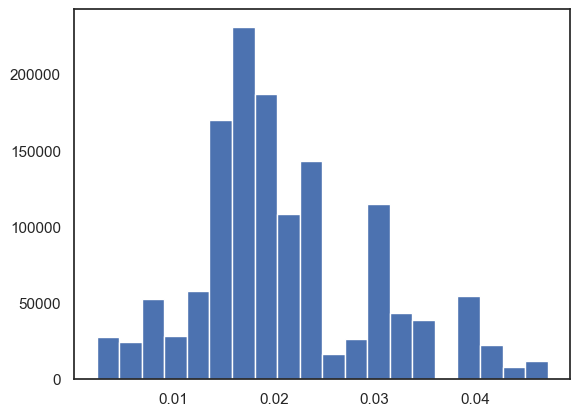

In [116]:
plt.hist(distance, bins=20)

In [117]:
print(san_fran_df_geo.crs)


EPSG:7131


In [118]:
print(pois_df_geo.crs)


EPSG:7131


# trip duration

In [119]:
x = san_fran_df_geo['trip_duration']
y = san_fran_df_geo['idle_time']

In [131]:
san_fran_df_geo['trip_duration'].mean()

Timedelta('0 days 00:14:40.350281557')

Text(0, 0.5, 'idle_time')

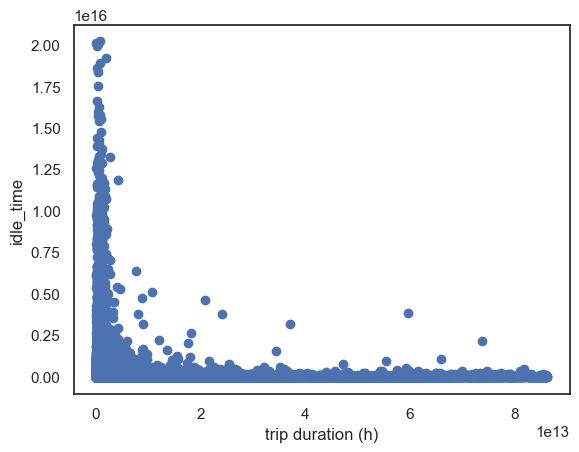

In [128]:
plt.scatter(x, y)
plt.xlabel('trip duration (h)')
plt.ylabel('idle_time')